In [15]:
# Imports
import torch
import os, os.path
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4070'

In [ ]:
#this is for kohei
data_dir = 'C:/Users/629ko/OneDrive/Desktop/Data'
mel_dir = 'C:/Users/629ko/OneDrive/Desktop/Melspec_data'
out_file_name = 'test1.wav'
short_dir = 'C:/Users/629ko/OneDrive/Desktop/Short'
test_dir = 'C:/Users/629ko/OneDrive/Desktop/Melspec_data_test'
load_test = 'C:/Users/629ko/OneDrive/Desktop/Data/albedo/vo_ABDLQ002_4_albedo_03.csv'

In [29]:
# Below is for joshua
data_dir = 'C:\\GenshinVoice\\Data'
mel_dir = 'C:\\GenshinVoice\\Melspec_data'
out_file_name = 'test1.wav'
short_dir = 'C:\\GenshinVoice\\Short'
test_dir = 'C:\\GenshinVoice\\Melspec_data_test'
load_test = 'C:\\GenshinVoice\\Melspec_data\\albedo\\vo_ABDLQ002_4_albedo_03.csv'

In [18]:
# Facts about the dataset
data_class = []
for name in os.listdir(data_dir):
    data_class.append(name)

print( 'number of classes: ', len([name for name in os.listdir(data_dir)]))
print('class names: ', data_class)

for i in data_class:
    print( 'number of sample in ', i, ': ', len([name for name in os.listdir(data_dir + '\\' + i)]))



number of classes:  7
class names:  ['albedo', 'kazuha', 'nahida', 'paimon', 'venti', 'yaeMiko', 'zhongli']
number of sample in  albedo :  1071
number of sample in  kazuha :  1001
number of sample in  nahida :  1236
number of sample in  paimon :  13427
number of sample in  venti :  1025
number of sample in  yaeMiko :  998
number of sample in  zhongli :  1024


(128, 98)


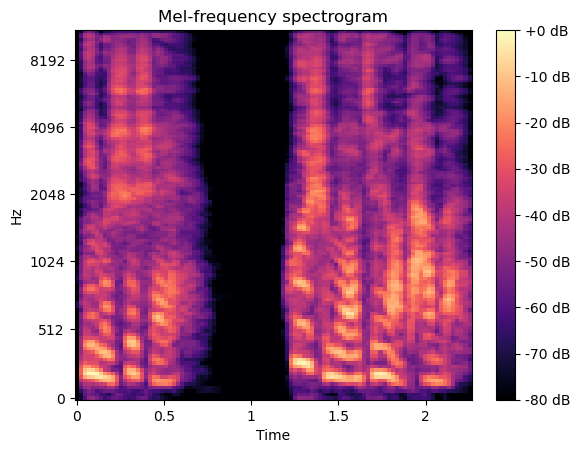

In [7]:
# Example File
filename = 'C:\\GenshinVoice\\Data\\albedo\\vo_ABDLQ002_4_albedo_01.wav'
y, sr = librosa.load(filename)
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
print(S_dB.shape)

(128, 147)


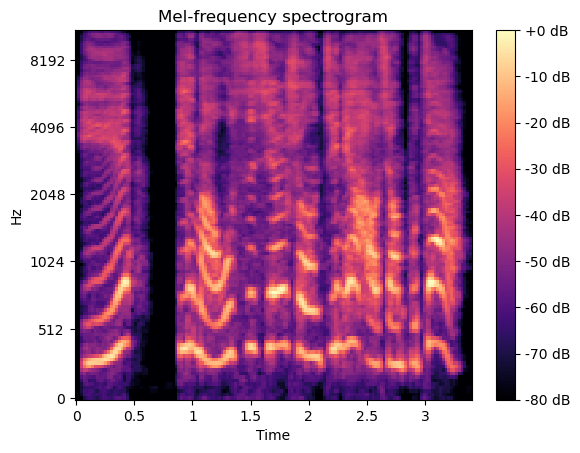

In [24]:
# Example File #2
filename = "C:\\GenshinVoice\\Data\\paimon\\vo_ABDLQ001_1_paimon_01.wav"
y, sr = librosa.load(filename)
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
print(S_dB.shape)

In [25]:
#Try to reconstruct audio from mel-spectrogram
S_dB = (S_dB + 80)/80.0
a = librosa.feature.inverse.mel_to_audio(librosa.db_to_power(S_dB*80-80, ref = 1558.466), sr = sr)
#a = librosa.feature.inverse.mel_to_audio(S, sr = sr)
sf.write(out_file_name, a, sr)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

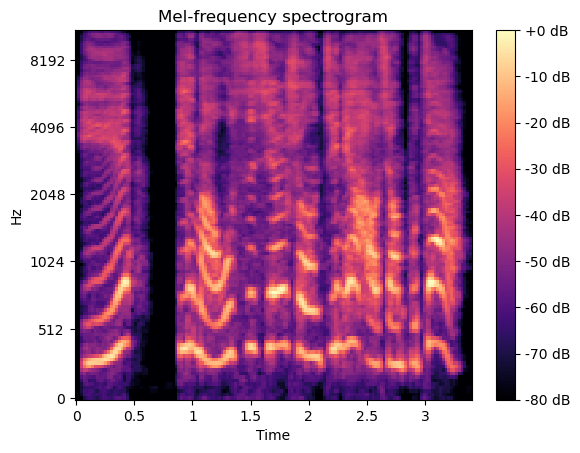

In [26]:
#mel-spectrogram from reconstructed audio
yr, srr = librosa.load(out_file_name)
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [27]:
#Ground truth vs reconstructed audio
#Can't get to 0 error due to frequency binning in specturalgram
print(y)
print(yr)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.3992111e-07
 -6.7847549e-07  8.6849343e-07]
[-0.00097656 -0.00048828 -0.00167847 ...  0.00057983 -0.00015259
  0.00033569]


In [60]:
#verify that all sample rate are the same, you don't have to run this part
sr_set = set()
for i in data_class:
    for name in os.listdir(data_dir + '\\' + i):
        y, sr = librosa.load(data_dir + '\\' + i + '\\' + name)
        sr_set.add(sr)

In [61]:
#all files have the same sample rate
#no need to resample, good!
sr_set

{22050}

In [7]:
#generate melspectrogram for all wav files
import random
import shutil
import math

for i in data_class:
    for name in os.listdir(data_dir + '/' + i):
        y, sr = librosa.load(data_dir + '/' + i + '/' + name)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)     #
        S_dB = (S_dB + 80)/80.0                       #
        #converting the wav file to csv file
        np.savetxt(data_dir+'/'+i+'/'+name.replace(".wav", ".csv"), S_dB, delimiter=",")
        
        #checking the length of the audio in csv file
        a = np.genfromtxt(data_dir + '/' + i + '/' + name.replace(".wav", ".csv"), delimiter=',')
        #moving to mel_folder is longer than 2s, short folder if not
        if(a.shape[1] < 100):
            shutil.move(data_dir + '/' + i + '/' + name.replace(".wav", ".csv"), short_dir)
        else: 
            shutil.move(data_dir + '/' + i + '/' + name.replace(".wav", ".csv"), mel_dir+ '/' + i + '/')
    #Separating train and test cases        
    total_num = len([name for name in os.listdir(mel_dir + '/' + i)])
    num_train = math.floor(0.7*total_num)
    num_test = total_num - num_train
    
    test_list = random.sample([name for name in os.listdir(mel_dir + '/' + i)], num_test)
    
    for files in test_list:
        shutil.move(mel_dir + '/' + i + '/' + files, test_dir  + '/' + i + '/')
            

        
        
        
#fix ¥¥ to / 
#added S_dB parts, lines with #
#changed last line to data_dir instead of mel_dir and made S into S_dB
#

In [28]:
for i in data_class:
    num_train = len([name for name in os.listdir(mel_dir + '\\' + i)])
    num_test = len([name for name in os.listdir(test_dir + '\\' + i)])
    num_total = num_train + num_test
    print( 'total number of sample in ', i, ': ', num_total)
    print( 'number of training sample in ', i, ': ', num_train)
    print( 'number of training sample in ', i, ': ', num_test)
    print( 'ratio of test/total = ',  num_test/num_total)
    print('\n')

total number of sample in  albedo :  867
number of training sample in  albedo :  606
number of training sample in  albedo :  261
ratio of test/total =  0.30103806228373703


total number of sample in  kazuha :  831
number of training sample in  kazuha :  581
number of training sample in  kazuha :  250
ratio of test/total =  0.3008423586040915


total number of sample in  nahida :  1117
number of training sample in  nahida :  781
number of training sample in  nahida :  336
ratio of test/total =  0.3008057296329454


total number of sample in  paimon :  10155
number of training sample in  paimon :  7108
number of training sample in  paimon :  3047
ratio of test/total =  0.3000492368291482


total number of sample in  venti :  853
number of training sample in  venti :  597
number of training sample in  venti :  256
ratio of test/total =  0.30011723329425555


total number of sample in  yaeMiko :  949
number of training sample in  yaeMiko :  664
number of training sample in  yaeMiko :  285

In [33]:
#makes .wav file from csv file
loaded_array = np.genfromtxt(load_test, delimiter=',')
a = librosa.feature.inverse.mel_to_audio(librosa.db_to_power(loaded_array*80-80, ref = 1000), sr = 22050)
out_file_name = 'test2.wav'
sf.write(out_file_name, a, sr)

## Do Not run code below
The code below are deprecated, it was used to show the characteristics of the datasets

In [3]:
# get statistics about data
global_data = {}

for i in data_class:
    class_data = []
    for name in os.listdir(mel_dir + '\\' + i):
        a = np.genfromtxt(mel_dir + '\\' + i + '\\' + name, delimiter=',')
        class_data.append(a.shape[1])
        
    global_data[i] = class_data

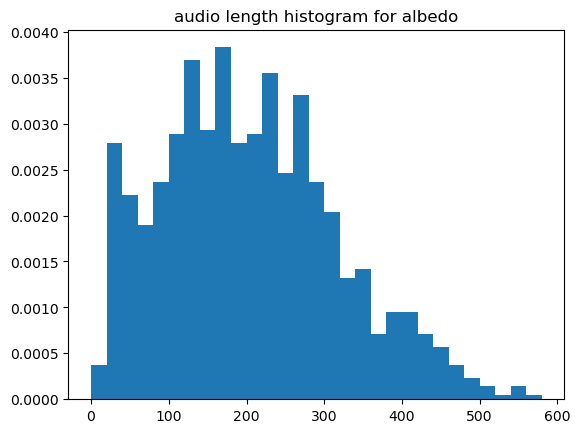

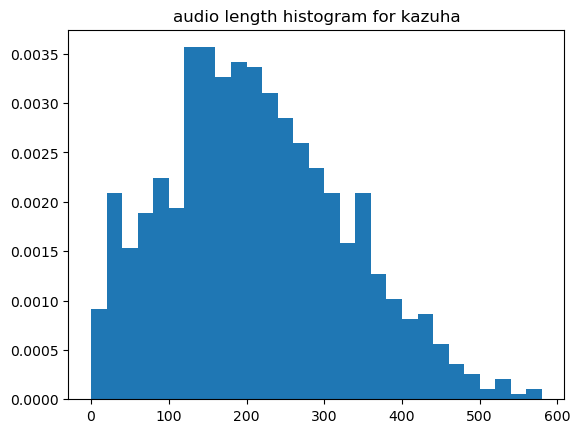

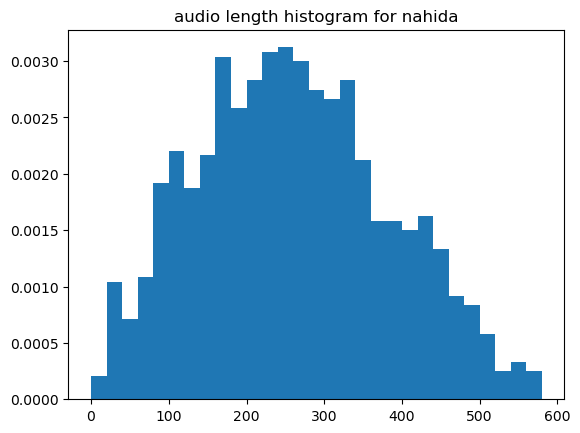

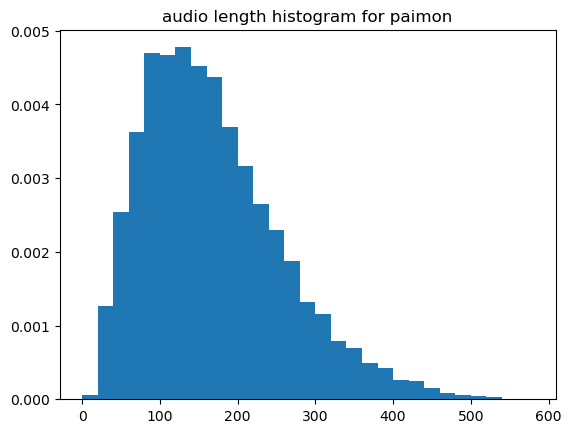

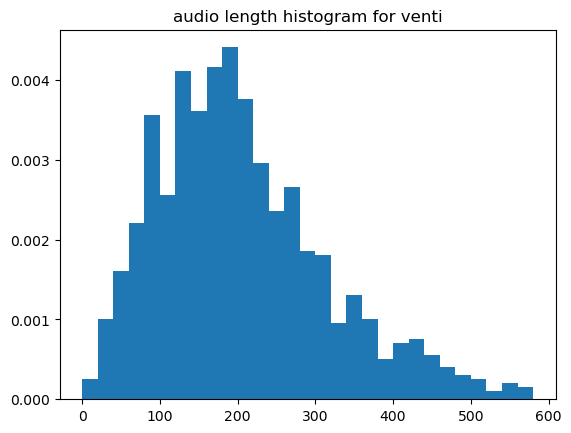

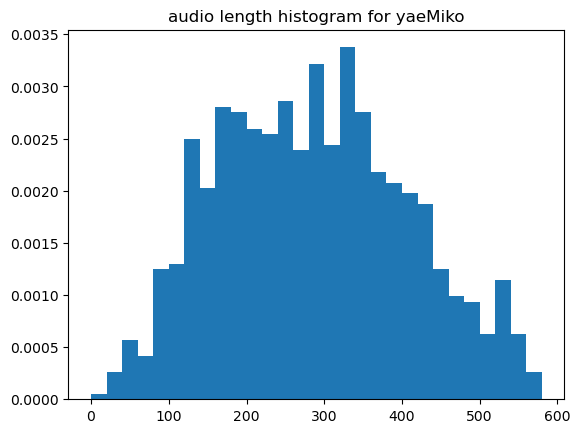

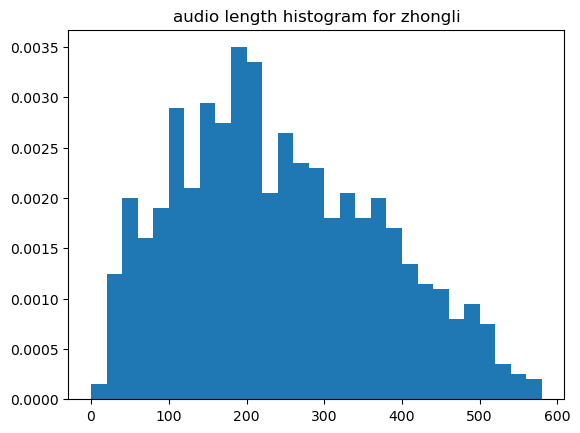

In [34]:
bins = np.arange(0,600, 20)
all_len = np.array([0])
for i in data_class: 
    _ = plt.hist(global_data[i], bins=bins, density=True)
    plt.title('audio length histogram for ' + i)
    plt.show()
    all_len = np.append(all_len, np.array(global_data[i]))

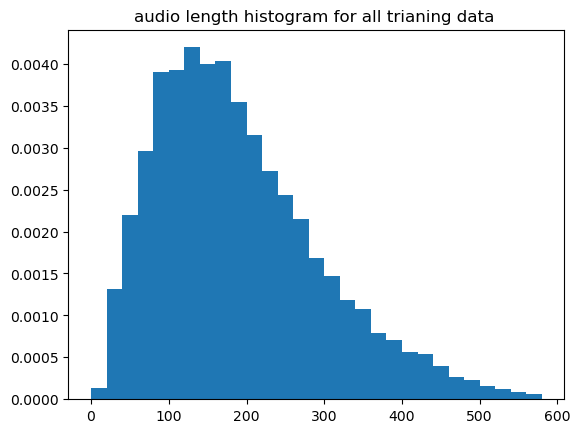

In [36]:
_ = plt.hist(all_len, bins=bins, density=True)
plt.title('audio length histogram for all trianing data ')
plt.show()

In [ ]:
# From data above it is decided that it is fine to delete any file with length < 100 (~2 sec)
# Then during training, the longer file will be cropped randomly to increase dataset size
# The dataset will also be divided into 30% test and 70% train
import random
import shutil



# move data into another folder
for i in data_class:
    for name in os.listdir(mel_dir + '\\' + i):
        a = np.genfromtxt(mel_dir + '\\' + i + '\\' + name, delimiter=',')
        if(a.shape[1] < 100):
            shutil.move(mel_dir + '\\' + i + '\\' + name, short_dir)



In [45]:
import math
for i in data_class:
    total_num = len([name for name in os.listdir(mel_dir + '\\' + i)])
    num_train = math.floor(0.7*total_num)
    num_test = total_num - num_train
    
    test_list = random.sample([name for name in os.listdir(mel_dir + '\\' + i)], num_test)
    
    for files in test_list:
        shutil.move(mel_dir + '\\' + i + '\\' + files, test_dir  + '\\' + i + '\\')
        

In [8]:
for i in data_class:
    num_train = len([name for name in os.listdir(mel_dir + '\\' + i)])
    num_test = len([name for name in os.listdir(test_dir + '\\' + i)])
    num_total = num_train + num_test
    print( 'total number of sample in ', i, ': ', num_total)
    print( 'number of training sample in ', i, ': ', num_train)
    print( 'number of training sample in ', i, ': ', num_test)
    print( 'ratio of test/total = ',  num_test/num_total)
    print('\n')

total number of sample in  albedo :  867
number of training sample in  albedo :  606
number of training sample in  albedo :  261
ratio of test/total =  0.30103806228373703


total number of sample in  kazuha :  831
number of training sample in  kazuha :  581
number of training sample in  kazuha :  250
ratio of test/total =  0.3008423586040915


total number of sample in  nahida :  1117
number of training sample in  nahida :  781
number of training sample in  nahida :  336
ratio of test/total =  0.3008057296329454


total number of sample in  paimon :  10155
number of training sample in  paimon :  7108
number of training sample in  paimon :  3047
ratio of test/total =  0.3000492368291482


total number of sample in  venti :  853
number of training sample in  venti :  597
number of training sample in  venti :  256
ratio of test/total =  0.30011723329425555


total number of sample in  yaeMiko :  949
number of training sample in  yaeMiko :  664
number of training sample in  yaeMiko :  285